In [208]:
# Import de libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import FuncionesIntervalos as fi
import FuncionesSinIntervalos as fsi

import importlib
importlib.reload(fi)
importlib.reload(fsi)
importlib.reload(plt)

<module 'matplotlib.pyplot' from '/Users/fpoblete/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

# Problema 1

In [209]:
p1datos = pd.Series([272,299,328,305,198,397,286,179,486,1557,890,823,704,497,434,257,574,191,345,136,125,158,513,563,102,149,513,449,456,1104,781,502,443,200,631,772,254,204,242,1782,220,232,82,298,146,112,434,414,103,1222,288,420,320,381,363,258,779,261,226,333,130,976,185,151,176,207,561,244,559,362,562,121,330,290,186,525,234,303,297,418,112,399,96,229,276,249,275,175,329,545,449,443,427,359,627,575,244,697,249,211])
p1datos = pd.Series.sort_values(p1datos)
p1datos = p1datos.reset_index(drop=True)

### a) Armar una tabla de frecuencias con 6 ó 7 intervalos y dibujar el histograma y las curvas acumuladas izquierda y derecha.

In [210]:
largo = (p1datos[99]-p1datos[0]) / 6
largo = largo.round() + 5
rangos = [p1datos[0] + (x * largo) for x in range(1, 9)]
rangos = pd.Series([p1datos[0]]).append(pd.Series(rangos))
rangos = rangos.reset_index(drop=True)

p1LI = rangos[0:6].reset_index(drop=True)
p1LS = rangos[1:7].reset_index(drop=True)

p1fSeries = pd.Series([])
for index in p1LI.index:
    p1fSeries = p1fSeries.append(pd.Series([(len( [value for value in p1datos if value >= p1LI[index] and value < p1LS[index]]))]))

p1fSeries = p1fSeries.reset_index(drop=True)

p1df = fi.CrearDataFrame(p1LI,p1LS,p1fSeries)

p1df


,X,LI,LS,f,fr,fr%,F,G,MP
0,82.0 - 370.0,82.0,370.0,59,0.59,59.0,59,100,226.0
1,370.0 - 658.0,370.0,658.0,29,0.29,29.0,88,41,514.0
2,658.0 - 946.0,658.0,946.0,7,0.07,7.0,95,12,802.0
3,946.0 - 1234.0,946.0,1234.0,3,0.03,3.0,98,5,1090.0
4,1234.0 - 1522.0,1234.0,1522.0,0,0.00,0.0,98,2,1378.0
5,1522.0 - 1810.0,1522.0,1810.0,2,0.02,2.0,100,2,1666.0


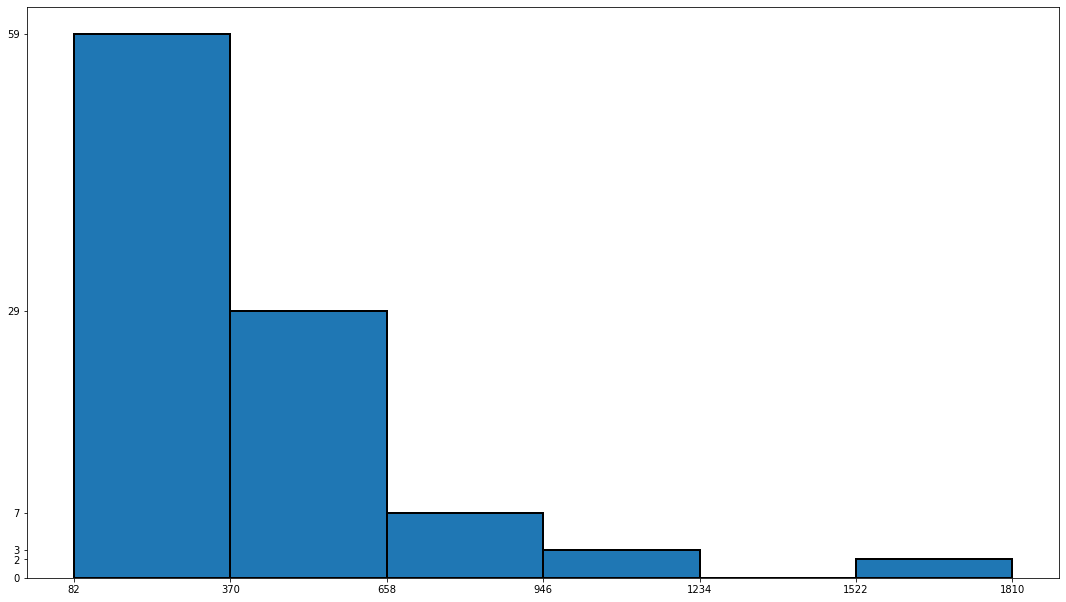

In [211]:
fi.Histograma(p1df)

### b) Calcular la media y la el desvío a partir de la tabla de frecuencias.

#### Media

In [212]:
# Calculo Promedio
fi.Promedio(p1df)

404.56

#### Desvio

In [213]:
fi.DesvioEstandar(p1df)

282.95212572897464

### c) Calcular el coeficiente de variación, el coeficiente de Asimetría y la curtosis. Sacar conclusiones.

### d) Calcular el porcentaje de cuentas mayores a $ 500 (X>500)

In [214]:
len([value for value in p1datos if value > 500]) * p1datos.count() / 100

25.0

# Problema 2

En un proceso productivo, el porcentaje diario de piezas defectuosas es una variable aleatoria de la cual se han registrado 160 observaciones que se agruparon en el siguiente cuadro:

In [215]:
p2df = fi.CrearDataFrame(pd.Series([0,2,4,6,8,10,12]), pd.Series([2,4,6,8,10,12,14]), pd.Series([4,26,50,35,25,14,6]))

# Mostrar tabla
p2df

,X,LI,LS,f,fr,fr%,F,G,MP
0,0 - 2,0,2,4,0.02500,2.500,4,160,1.0
1,2 - 4,2,4,26,0.16250,16.250,30,156,3.0
2,4 - 6,4,6,50,0.31250,31.250,80,130,5.0
3,6 - 8,6,8,35,0.21875,21.875,115,80,7.0
4,8 - 10,8,10,25,0.15625,15.625,140,45,9.0
5,10 - 12,10,12,14,0.08750,8.750,154,20,11.0
6,12 - 14,12,14,6,0.03750,3.750,160,6,13.0


### a) Calcular la media y el desvío de estos datos, dibujar el histograma y las curvas de frecuencias acumuladas.

#### Promedio

In [216]:
fi.Promedio(p2df)

6.4625

#### Desvio

In [217]:
fi.DesvioEstandar(p2df)

2.8080914084998314

#### Histograma

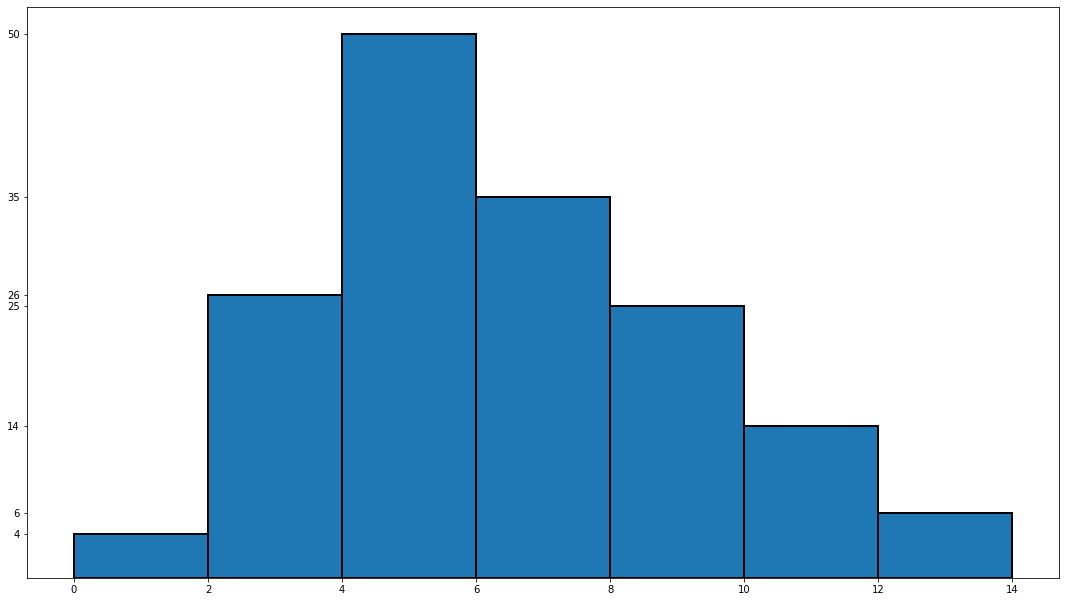

In [218]:
fi.Histograma(p2df)

### b) Calcular el porcentaje de días dónde: (x>2,5) y (x<7).

In [219]:
valorLimite = 2.5
100 - fi.Porcentaje(p2df, valorLimite, df[(df["LI"] < valorLimite) & (df["LS"] > valorLimite)])

1    93.4375
dtype: float64

In [220]:
valorLimite = 7
fi.Porcentaje(p2df, valorLimite, df[(df["LI"] < valorLimite) & (df["LS"] > valorLimite)])

3    60.9375
dtype: float64

### c) Calcular el valor de la variable superado el 90% de los días.

### d) De los días que se supera el 4,5 %, ¿qué porcentaje de los días el porcentaje de piezas defectuosas es inferior al 11 %?

### e) Calcular coeficiente de variación.Sacar conclusiones.

In [221]:
fi.CoeficienteVariacion(p2df)

43.45209142746354

# Problema 3

El consumo diario de agua (medido en miles de litros) en una curtiembre responde a la siguiente distribución  de frecuencias:

In [222]:
p3df = fi.CrearDataFrame(pd.Series([20,30,40,50,60,70]), pd.Series([30,40,50,60,70,80]), pd.Series([1,15,39,32,11,2]))

# Mostrar tabla
p3df

,X,LI,LS,f,fr,fr%,F,G,MP
0,20 - 30,20,30,1,0.01,1.0,1,100,25.0
1,30 - 40,30,40,15,0.15,15.0,16,99,35.0
2,40 - 50,40,50,39,0.39,39.0,55,84,45.0
3,50 - 60,50,60,32,0.32,32.0,87,45,55.0
4,60 - 70,60,70,11,0.11,11.0,98,13,65.0
5,70 - 80,70,80,2,0.02,2.0,100,2,75.0


a) Calcular la media, la varianza, dibujar el histograma y las curvas de frecuencias acumuladas.

In [223]:
fi.Promedio(p3df)

49.3

In [224]:
fi.Varianza(p3df)

95.46464646464646

b) Calcular el porcentaje de los días que: (x>32) y (x<51).

In [225]:
valorLimite = 32
100 - fi.Porcentaje(p3df, valorLimite, p3df[(p3df["LI"] < valorLimite) & (p3df["LS"] > valorLimite)])

1    96.0
dtype: float64

In [226]:
valorLimite = 51
fi.Porcentaje(p3df, valorLimite, p3df[(p3df["LI"] < valorLimite) & (p3df["LS"] > valorLimite)])

3    58.2
dtype: float64

c) Calcular la mediana y el valor de la variable superado el 10%, el 40% y el 90 % de los días.

#### Mediana

In [227]:
fi.Mediana(p3df)

48.717948717948715

In [228]:
fi.Percentil(p3df, 90)

4    62.727273
dtype: float64

In [229]:
fi.Percentil(p3df, 60)

3    51.5625
dtype: float64

In [230]:
fi.Percentil(p3df, 10)

1    36.0
dtype: float64

d) Calcular coeficiente de variación.

In [231]:
fi.CoeficienteVariacion(p3df)

19.818663552092424

# Problema 4

Se tomaron datos de 200 establecimientos agropecuarios en una región agrícola, registrándose para cada uno los rendimientos de la cosecha de girasol obtenidos en la última campaña, con los siguientes resultados (kg/ha)

In [232]:
p4df = fi.CrearDataFrame(pd.Series([1400,1500,1600,1700,1800,1900,2000,2100]), pd.Series([1500,1600,1700,1800,1900,2000,2100,2200]), pd.Series([2,7,26,64,57,33,10,1]))

# Mostrar tabla
p4df

,X,LI,LS,f,fr,fr%,F,G,MP
0,1400 - 1500,1400,1500,2,0.010,1.0,2,200,1450.0
1,1500 - 1600,1500,1600,7,0.035,3.5,9,198,1550.0
2,1600 - 1700,1600,1700,26,0.130,13.0,35,191,1650.0
3,1700 - 1800,1700,1800,64,0.320,32.0,99,165,1750.0
4,1800 - 1900,1800,1900,57,0.285,28.5,156,101,1850.0
5,1900 - 2000,1900,2000,33,0.165,16.5,189,44,1950.0
6,2000 - 2100,2000,2100,10,0.050,5.0,199,11,2050.0
7,2100 - 2200,2100,2200,1,0.005,0.5,200,1,2150.0


a) Calcular el rendimiento promedio y su desvío estándar.

#### Promedio

In [233]:
fi.Promedio(p4df)

1805.5

#### Desvio

In [234]:
fi.DesvioEstandar(p4df)

123.88092029065776

b) Calcular: ¿Qué porcentaje de los establecimientos ha superado los 2000 kg/ha.

In [235]:
valorLimite = 2000
100 - fi.Porcentaje(p4df, valorLimite, p4df[(p4df["LI"] < valorLimite) & (p4df["LS"] >= valorLimite)])

5    5.5
dtype: float64

c) Calcular el rendimiento garantizado para la región con 90 % de confianza.

In [236]:
fi.Percentil(p4df, 10)

2    1642.307692
dtype: float64

d) Calcular coeficiente de variación

In [237]:
fi.CoeficienteVariacion(p4df)

6.86130824096692

# Problema 5

Se pide calcular el valor medio y el desvío estándar de los siguientes datos que corresponden a la Tasa anual de Sarampión en la Provincia de Neuquén por 100.000 habitantes:

In [238]:
p5df = pd.DataFrame({
    "Año": [1983,1984,1985,1986,1987,1988,1989],
    "Tasa": [2.13,37.92,4.84,1.54,1.17,9.46,136.43]
})

p5df

,Año,Tasa
0,1983,2.13
1,1984,37.92
2,1985,4.84
3,1986,1.54
4,1987,1.17
5,1988,9.46
6,1989,136.43


#### Promedio

In [239]:
p5df["Tasa"].mean()

27.641428571428573

#### Desvio Estandar

In [240]:
pd.Series.std(p5df["Tasa"])

49.70567688187853

# Problema 6

En un servicio de venta telefónica se registraron, para los operadores que atienden las consultas en un turno de 4 horas, los tiempos de atención por cada llamada entrante (medida en minutos / llamada): 

Calcular el tiempo promedio de atención por llamada y las llamadas promedio que se atienden para consulta en un minuto dado

In [241]:
p6df = fsi.CrearDataFrame([1.5,2,2.5,3,3.5], [10,15,40,20,10])

p6df

,x,f,fr,fr%,F,G
0,1.5,10,0.105263,10.526316,10,95
1,2.0,15,0.157895,15.789474,25,85
2,2.5,40,0.421053,42.105263,65,70
3,3.0,20,0.210526,21.052632,85,30
4,3.5,10,0.105263,10.526316,95,10


In [242]:
fsi.Promedio(p6df)

2.526315789473684

In [243]:
1/fsi.Promedio(p6df)

0.39583333333333337

# Problema 7

En una fábrica de calzado de seguridad, se ha recibido un pedido de 7.000 pares de botines con puntera de acero para una empresa de laminación y fundición. Por registros históricos del sector de métodos y tiempos, se tienen registrado los tiempos de armado en la siguiente tabla de frecuencias (medidos en minutos por cada par que utiliza un operario):

In [244]:
p7df = fsi.CrearDataFrame([10,12,15,18,20], [5,20,50,10,2])

p7df

,x,f,fr,fr%,F,G
0,10,5,0.057471,5.747126,5,87
1,12,20,0.229885,22.988506,25,82
2,15,50,0.574713,57.471264,75,62
3,18,10,0.114943,11.494253,85,12
4,20,2,0.022989,2.298851,87,2


a) Calcular la tasa de productividad promedio (cantidad de pares por minuto).

In [245]:
# Calculo Promedio
minutoPorPar = 1/fsi.Promedio(p7df)
minutoPorPar

0.06904761904761905

b) Calcular el tiempo necesario para cumplir con el pedido.

In [246]:
minutosParapPedido = 7000 / minutoPorPar
minutosParapPedido

101379.31034482758

c) Si se dispone de 120 horas, ¿cuántos operarios serán necesarios?

In [247]:
minutosParapPedido / (120 * 60)

14.080459770114942